# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

[0.001, 0.011380504700643251, 0.11690607734806639, 0.6035517634803318, 0.9459680554381814, 0.9950577515521439, 0.9995682911846789, 0.9999624453001201, 0.9999967342619444]


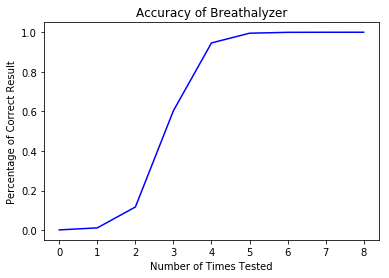

In [41]:
import matplotlib.pyplot as plt

def prob_drunk_given_positive(prob_drunk_prior, false_positive):
  true_positive = 1 - false_positive
  return (true_positive * prob_drunk_prior) / ((true_positive * prob_drunk_prior) + ((1.0-true_positive) * (1.0-prob_drunk_prior)))

prior_drunk = [0.001]
false_positive = 0.08
for _ in range(8):
  prior_drunk.append(prob_drunk_given_positive(prior_drunk[-1], false_positive))
print(prior_drunk)

plt.plot(range(len(prior_drunk)), prior_drunk, color="blue");
plt.xlabel("Number of Times Tested");
plt.ylabel("Percentage of Correct Result");
plt.title("Accuracy of Breathalyzer");

       mean  lower_limit  upper_limit     error
0  0.202247    -0.397828     0.802322  0.600075
1  0.003745    -0.586433     0.593924  0.590178
2  0.756554     0.361336     1.151772  0.395218
3 -0.865169    -1.158765    -0.571572  0.293596
4 -0.543071    -1.049896    -0.036246  0.506825
       mean  lower_limit  upper_limit     error
0  0.202247    -0.397828     0.802322  0.600075
1  0.003745    -0.586433     0.593924  0.590178
2  0.756554     0.361336     1.151772  0.395218
3 -0.865169    -1.158765    -0.571572  0.293596
4 -0.543071    -1.049896    -0.036246  0.506825


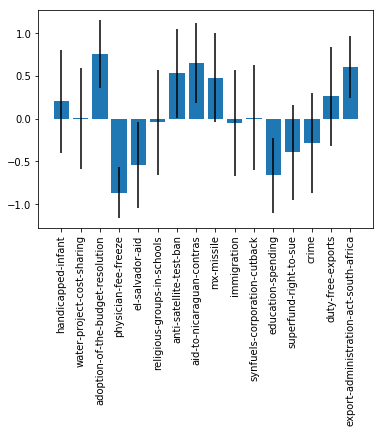

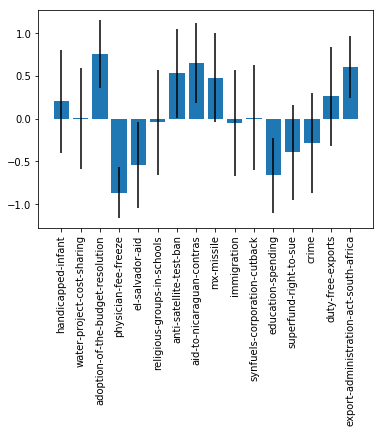

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

columns = ["party", "handicapped-infant", "water-project-cost-sharing","adoption-of-the-budget-resolution",
"physician-fee-freeze", "el-salvador-aid", "religious-groups-in-schools", "anti-satellite-test-ban",
"aid-to-nicaraguan-contras", "mx-missile", "immigration", "synfuels-corporation-cutback", "education-spending", 
"superfund-right-to-sue", "crime", "duty-free-exports", "export-administration-act-south-africa"]
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", names=columns)
data = data.replace({"?": 0, "n": -1, "y": 1})
data_dem = data[data["party"] == "democrat"]
data_dem = data_dem.drop("party", axis="columns")

def confidence_interval_dataframe(df):
  confidence_intervals = []
  df = df.values.T
  mean = df.mean
  for col in df:
    mean = col.mean()
    deg_free = len(col)-1
    sample_std = np.std(col, ddof=1)
    std_err = sample_std/n**.5
    confidence_intervals.append([mean] + list(stats.t.interval(.95, deg_free, loc=mean, scale=std_err)))
  confidence_intervals = pd.DataFrame(confidence_intervals, columns=["mean", "lower_limit", "upper_limit"])  
  confidence_intervals["error"] = confidence_intervals["upper_limit"] - confidence_intervals["mean"]
  return confidence_intervals

def confidence_interval_dataframe_baye(df):
  confidence_intervals = []
  df = df.values.T
  for col in df:
    interval = stats.bayes_mvs(col)
    confidence_intervals.append([interval[0][0], interval[0][1][0], interval[0][1][1]])
  print(confidence_intervals)
  confidence_intervals = pd.DataFrame(confidence_intervals, columns=["mean", "lower_limit", "upper_limit"]) 
  confidence_intervals["error"] = confidence_intervals["upper_limit"] - confidence_intervals["mean"]
  return confidence_intervals

def plot_confidence_interval(df):
  print(df.head(5))
  fig, ax = plt.subplots()
  means = df["mean"]
  err = df["error"]
  x_range = range(df.shape[0])
  ax.bar(x_range, means, yerr=err)
  ax.set_xticks(x_range)
  plt.xticks(rotation=90)
  ax.set_xticklabels(columns[1:])
  

plot_confidence_interval(confidence_interval_dataframe(data_dem))
plot_confidence_interval(confidence_interval_dataframe(data_dem))


Freqeuntist Statistic looks at the data and makes inferences directly from it.
Bayesian Statistic uses prior knowledge and assumptions to make future inferences.


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)